In [1]:
import os
os.chdir('/Users/melon/Documents/Stat/assignment_1/Data')
os.getcwd()

'/Users/melon/Documents/Stat/assignment_1/Data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def remove_not_assign_region(df , region):
    for index,row in df.iterrows():
        if (row['Region'] == region):
            continue
        else:
            df.drop(index , inplace=True)
            
def finad_iqr(df_in , col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    return q3-q1


def without_outlier_info(df , col_name):
    df1 = df.copy()
    df1 = remove_outlier_IQR(df1,col_name)
    return df1
    

In [4]:
regions = pd.read_csv('countries_regions.csv')

# GDP

In [5]:
df = pd.read_csv('gdp.csv')

In [6]:
gdp2008 = regions.join(df["2008 [YR2008]"])
gdp2008.rename(columns = {'2008 [YR2008]':'GDP[2008]'}, inplace=True)

<AxesSubplot:>

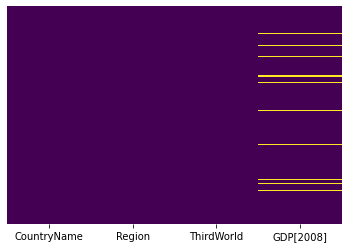

In [7]:
gdp2008 = gdp2008.replace({'..':np.nan})
sns.heatmap(gdp2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [8]:
gdp2008.dropna(inplace=True)

In [124]:
# gdp2018[gdp2018['Region'] == 'Thailand']

,CountryName,Region,GDP[2018]
192,Thailand,Thailand,5.066111e+11


<AxesSubplot:>

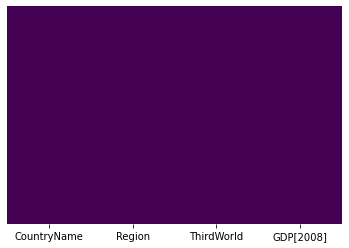

In [9]:
sns.heatmap(gdp2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [10]:
gdp2008 = gdp2008.astype({'GDP[2008]':float})

In [11]:
gdp2008.drop(['ThirdWorld'], axis=1 , inplace=True)

In [12]:
africa_gdp2008 = gdp2008[gdp2008["Region"] == "Africa"]
africa_gdp2008.describe()

,GDP[2008]
count,5.300000e+01
mean,3.454238e+10
std,6.889965e+10
min,1.880212e+08
25%,3.294093e+09
50%,1.039383e+10
75%,2.771514e+10
max,3.394762e+11


In [13]:
print(find_iqr(africa_gdp2008,'GDP[2008]'))

24421051095.0


In [14]:
africa_gdp2008_wo = without_outlier_info(africa_gdp2008 , 'GDP[2008]')
africa_gdp2008_wo.describe()

,GDP[2008]
count,4.500000e+01
mean,1.129557e+10
std,1.089337e+10
min,1.880212e+08
25%,1.985241e+09
50%,9.451436e+09
75%,1.557135e+10
max,4.486097e+10


In [15]:
print(find_iqr(africa_gdp2008_wo,'GDP[2008]'))

13586108790.0


In [16]:
north_eu_gdp2008 = gdp2008[gdp2008["Region"] == "Northern Europe"]
north_eu_gdp2008.describe()

,GDP[2008]
count,1.300000e+01
mean,3.821545e+11
std,7.908753e+11
min,2.432416e+09
25%,1.807462e+10
50%,4.779755e+10
75%,3.533610e+11
max,2.938882e+12


In [17]:
print(find_iqr(north_eu_gdp2008,'GDP[2008]'))

335286415831.0


In [18]:
north_eu_gdp2008_wo = without_outlier_info(north_eu_gdp2008 , 'GDP[2008]')
north_eu_gdp2008_wo.describe()

,GDP[2008]
count,1.200000e+01
mean,1.690938e+11
std,1.963783e+11
min,2.432416e+09
25%,1.503807e+10
50%,4.182591e+10
75%,3.017557e+11
max,5.177061e+11


In [19]:
print(find_iqr(north_eu_gdp2008_wo, 'GDP[2008]'))

286717669868.0


In [20]:
south_asia_gdp2008 = gdp2008[gdp2008["Region"] == "Southeast Asia"]
south_asia_gdp2008.describe()

,GDP[2008]
count,1.000000e+01
mean,6.130550e+11
std,1.508947e+12
min,6.484927e+08
25%,1.136221e+10
50%,1.403774e+11
75%,2.215134e+11
max,4.884301e+12


In [21]:
print(find_iqr(south_asia_gdp2008,'GDP[2008]'))

210151209628.25


In [22]:
south_asia_gdp2008_wo = without_outlier_info(south_asia_gdp2008 , 'GDP[2008]')
south_asia_gdp2008_wo.describe()

,GDP[2008]
count,9.000000e+00
mean,1.384721e+11
std,1.664639e+11
min,6.484927e+08
25%,1.035191e+10
50%,9.913030e+10
75%,1.936120e+11
max,5.102286e+11


In [23]:
print(find_iqr(south_asia_gdp2008_wo, 'GDP[2008]'))

183260072620.0


In [24]:
gdp2018 = regions.join(df["2018 [YR2018]"])
gdp2018.rename(columns = {'2018 [YR2018]':'GDP[2018]'}, inplace=True)
gdp2018 = gdp2018.replace({'..':np.nan})

<AxesSubplot:>

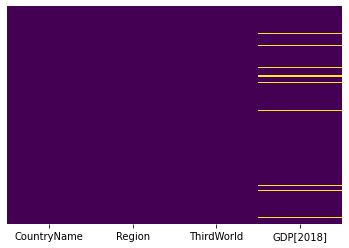

In [25]:
sns.heatmap(gdp2018.isnull() , yticklabels=False , cbar=False , cmap='viridis')

<AxesSubplot:>

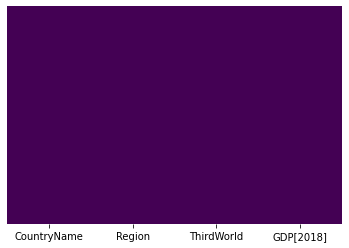

In [26]:
gdp2018.dropna(inplace=True)
sns.heatmap(gdp2018.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [27]:
gdp2018 = gdp2018.astype({'GDP[2018]':float})

In [28]:
gdp2018[gdp2018["Region"]=='Thailand']

,CountryName,Region,ThirdWorld,GDP[2018]
192,Thailand,Thailand,0,5.066111e+11


In [29]:
gdp2018.drop(['ThirdWorld'], axis=1 , inplace=True)

In [30]:
africa_gdp2018 = gdp2018[gdp2018["Region"] == "Africa"]

In [31]:
africa_gdp2018.describe()

,GDP[2018]
count,5.200000e+01
mean,4.593002e+10
std,8.531233e+10
min,4.122538e+08
25%,4.706901e+09
50%,1.422218e+10
75%,4.371420e+10
max,4.048421e+11


In [32]:
print(find_iqr(africa_gdp2018,'GDP[2018]'))

39007303205.0


In [33]:
africa_gdp2018_wo = without_outlier_info(africa_gdp2018 , 'GDP[2018]')
africa_gdp2018_wo.describe()

,GDP[2018]
count,4.700000e+01
mean,2.220444e+10
std,2.517681e+10
min,4.122538e+08
25%,4.375268e+09
50%,1.368206e+10
75%,2.863797e+10
max,1.013532e+11


In [34]:
print(find_iqr(africa_gdp2018_wo , 'GDP[2018]'))

24262702474.5


In [35]:
northern_eu_gdp2018 = gdp2018[gdp2018["Region"] == "Northern Europe"]

In [36]:
northern_eu_gdp2018.describe()

,GDP[2018]
count,1.300000e+01
mean,3.899219e+11
std,7.796762e+11
min,3.040414e+09
25%,2.626706e+10
50%,5.372466e+10
75%,3.848537e+11
max,2.900791e+12


In [37]:
print(find_iqr(northern_eu_gdp2018 , 'GDP[2018]'))

358586621473.0


In [38]:
northern_eu_gdp2018_wo = without_outlier_info(northern_eu_gdp2018 , 'GDP[2018]')
northern_eu_gdp2018_wo.describe()

,GDP[2018]
count,1.200000e+01
mean,1.806827e+11
std,2.055814e+11
min,3.040414e+09
25%,2.157329e+10
50%,4.406844e+10
75%,3.638443e+11
max,5.554554e+11


In [39]:
print(find_iqr(northern_eu_gdp2018_wo, 'GDP[2018]'))

342271043468.5


In [40]:
southeast_gdp2018 = gdp2018[gdp2018["Region"] == "Southeast Asia"]

In [41]:
southeast_gdp2018.describe()

,GDP[2018]
count,1.000000e+01
mean,2.494110e+11
std,3.197955e+11
min,1.583876e+09
25%,1.974918e+10
50%,1.561792e+11
75%,3.558042e+11
max,1.042272e+12


In [42]:
print(find_iqr(southeast_gdp2018 , 'GDP[2018]'))

336055049370.75


In [43]:
southeast_gdp2018_wo = without_outlier_info(southeast_gdp2018 , 'GDP[2018]')
southeast_gdp2018_wo.describe()

,GDP[2018]
count,9.000000e+00
mean,1.613154e+11
std,1.665633e+11
min,1.583876e+09
25%,1.814165e+10
50%,6.714473e+10
75%,3.468421e+11
max,3.759815e+11


In [44]:
print(find_iqr(southeast_gdp2018_wo, 'GDP[2018]'))

328700442794.0


# Population

In [45]:
df = pd.read_csv('population.csv')

In [46]:
population2008 = regions.join(df["2008 [YR2008]"])
population2008.rename(columns = {'2008 [YR2008]':'Population[2008]'}, inplace=True)

,CountryName,Region,ThirdWorld,Population[2008]
0,Afghanistan,South Asia,1,27722281.0
1,Albania,Eastern Europe,0,2947314.0
2,Algeria,Africa,0,34730604.0
3,American Samoa,Australia and Oceanea,0,57490.0
4,Andorra,Western Europe,0,83860.0
...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,108397.0
213,West Bank and Gaza,Middle East,0,3591977.0
214,"Yemen, Rep.",Middle East,1,21892149.0
215,Zambia,Africa,1,12848531.0


<AxesSubplot:>

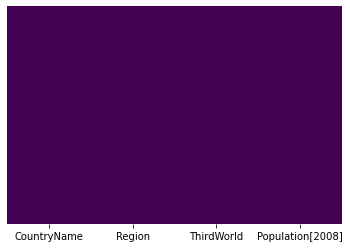

In [47]:
population2008 = population2008.replace({'..':np.nan})
sns.heatmap(population2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [48]:
population2008.dropna(inplace=True)

<AxesSubplot:>

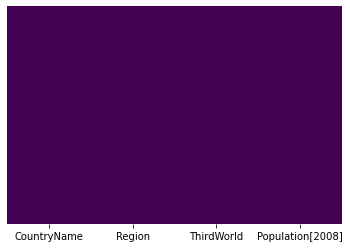

In [49]:
sns.heatmap(population2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [50]:
population2008 = population2008.astype({'Population[2008]':float})

In [51]:
population2008.drop(['ThirdWorld'], axis=1 , inplace=True)

In [52]:
population2008[population2008["Region"] == 'Thailand']

,CountryName,Region,Population[2008]
192,Thailand,Thailand,66530980.0


In [53]:
africa_pop2008 = population2008[population2008["Region"] == "Africa"]

In [54]:
africa_pop2008.describe()

,Population[2008]
count,5.400000e+01
mean,1.826182e+07
std,2.621291e+07
min,8.695600e+04
25%,2.298232e+06
50%,1.007661e+07
75%,2.127085e+07
max,1.502696e+08


In [55]:
print(find_iqr(africa_pop2008 , 'Population[2008]'))

18972614.0


In [56]:
africa_pop2008_wo = without_outlier_info(africa_pop2008, 'Population[2008]')
africa_pop2008_wo.describe()

,Population[2008]
count,4.900000e+01
mean,1.149237e+07
std,1.120708e+07
min,8.695600e+04
25%,1.987130e+06
50%,8.736932e+06
75%,1.525091e+07
max,4.185394e+07


In [57]:
print(find_iqr(africa_pop2008_wo,'Population[2008]'))

13263783.0


In [58]:
northern_eu_pop2008 = population2008[population2008["Region"] == "Northern Europe"]

In [59]:
northern_eu_pop2008.describe()

,Population[2008]
count,1.300000e+01
mean,7.562241e+06
std,1.653240e+07
min,4.782200e+04
25%,3.174140e+05
50%,3.198231e+06
75%,5.313399e+06
max,6.180700e+07


In [60]:
print(find_iqr(northern_eu_pop2008 , 'Population[2008]'))

4995985.0


In [61]:
northern_eu_pop2008_wo = without_outlier_info(northern_eu_pop2008 , 'Population[2008]')
northern_eu_pop2008_wo.describe()

,Population[2008]
count,1.200000e+01
mean,3.041845e+06
std,2.894230e+06
min,4.782200e+04
25%,2.589392e+05
50%,2.687776e+06
75%,4.904509e+06
max,9.219637e+06


In [62]:
print(find_iqr(northern_eu_pop2008_wo, 'Population[2008]'))

4645569.5


In [63]:
southeast_pop2008 = population2008[population2008["Region"] == 'Southeast Asia']
southeast_pop2008.describe()

,Population[2008]
count,1.000000e+01
mean,5.159855e+07
std,7.303863e+07
min,3.794180e+05
25%,5.141204e+06
50%,2.055992e+07
75%,7.716498e+07
max,2.354698e+08


In [64]:
print(find_iqr(southeast_pop2008 , 'Population[2008]'))

72023774.0


In [65]:
southeast_pop2008_wo = without_outlier_info(southeast_pop2008 , 'Population[2008]')
southeast_pop2008_wo.describe()

,Population[2008]
count,9.000000e+00
mean,3.116842e+07
std,3.613626e+07
min,3.794180e+05
25%,4.839396e+06
50%,1.388384e+07
75%,4.992964e+07
max,9.090197e+07


In [66]:
print(find_iqr(southeast_pop2008_wo, 'Population[2008]'))

45090246.0


In [67]:
population2018 = regions.join(df["2018 [YR2018]"])
population2018.rename(columns = {'2018 [YR2018]':'Population[2018]'}, inplace=True)
population2018 = population2018.replace({'..':np.nan})

In [68]:
population2018.dropna(inplace=True)

<AxesSubplot:>

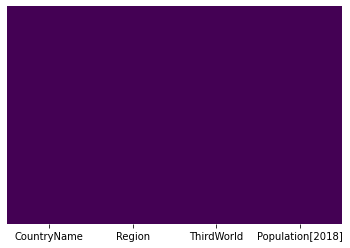

In [69]:
sns.heatmap(population2018.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [70]:
population2018.drop(['ThirdWorld'] , axis=1 , inplace=True)

In [71]:
population2018[population2018["Region"]=='Thailand']

,CountryName,Region,Population[2018]
192,Thailand,Thailand,69428454


In [72]:
population2018 = population2018.astype({'Population[2018]':float})

In [73]:
africa_pop2018 = population2018[population2018['Region'] == 'Africa']

In [74]:
africa_pop2018.describe()

,Population[2018]
count,5.300000e+01
mean,2.397642e+07
std,3.424217e+07
min,9.676200e+04
25%,2.448300e+06
50%,1.241429e+07
75%,2.949601e+07
max,1.958747e+08


In [75]:
print(find_iqr(africa_pop2018 , 'Population[2018]'))

27047709.0


In [76]:
africa_pop2018_wo = without_outlier_info(africa_pop2018 , 'Population[2018]')
africa_pop2018_wo.describe()

,Population[2018]
count,4.900000e+01
mean,1.598285e+07
std,1.572603e+07
min,9.676200e+04
25%,2.280092e+06
50%,1.156520e+07
75%,2.506923e+07
max,5.779252e+07


In [77]:
print(find_iqr(africa_pop2018 , 'Population[2018]'))

27047709.0


In [78]:
northern_eu_pop2018 = population2018[population2018['Region'] == 'Northern Europe']
northern_eu_pop2018.describe()

,Population[2018]
count,1.300000e+01
mean,8.055074e+06
std,1.781001e+07
min,4.849700e+04
25%,3.527210e+05
50%,2.801543e+06
75%,5.515525e+06
max,6.646034e+07


In [79]:
print(find_iqr(northern_eu_pop2018 , 'Population[2018]'))

5162804.0


In [80]:
northern_eu_pop2018_wo = without_outlier_info(northern_eu_pop2018 , 'Population[2018]')
northern_eu_pop2018_wo.describe()

,Population[2018]
count,1.200000e+01
mean,3.187968e+06
std,3.175460e+06
min,4.849700e+04
25%,2.855590e+05
50%,2.364358e+06
75%,5.362818e+06
max,1.017521e+07


In [81]:
print(find_iqr(northern_eu_pop2018_wo , 'Population[2018]'))

5077259.25


In [82]:
southeast_pop2018 = population2018[population2018['Region'] == 'Southeast Asia']
southeast_pop2018.describe()

,Population[2018]
count,1.000000e+01
mean,5.857512e+07
std,8.304399e+07
min,4.289600e+05
25%,5.994382e+06
50%,2.388891e+07
75%,8.508655e+07
max,2.676705e+08


In [83]:
print(find_iqr(southeast_pop2018 , 'Population[2018]'))

79092167.25


In [84]:
southeast_pop2018_wo = without_outlier_info(southeast_pop2018 , 'Population[2018]')
southeast_pop2018_wo.describe()

,Population[2018]
count,9.000000e+00
mean,3.534229e+07
std,4.106087e+07
min,4.289600e+05
25%,5.638676e+06
50%,1.624980e+07
75%,5.370832e+07
max,1.066514e+08


In [85]:
print(find_iqr(southeast_pop2018_wo , 'Population[2018]'))

48069642.0


# Unemployment

In [86]:
df = pd.read_csv('unemployment.csv')

In [87]:
unemployment2008 = regions.join(df["2008 [YR2008]"])
unemployment2008.rename(columns = {'2008 [YR2008]':'Unemployment[2008]'}, inplace=True)

<AxesSubplot:>

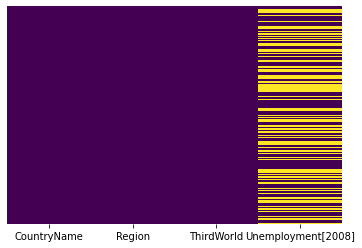

In [88]:
unemployment2008 = unemployment2008.replace({'..':np.nan})
sns.heatmap(unemployment2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

<AxesSubplot:>

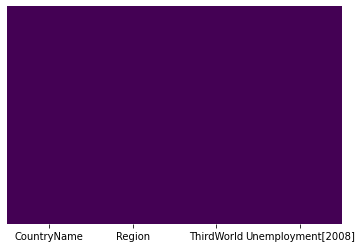

In [89]:
unemployment2008.dropna(inplace=True)
sns.heatmap(unemployment2008.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [90]:
unemployment2008 = unemployment2008.astype({'Unemployment[2008]':float})

In [91]:
unemployment2008.drop(['ThirdWorld'] , axis=1 , inplace=True)

In [92]:
africa_unemployment2008 = unemployment2008[unemployment2008['Region'] == 'Africa']
africa_unemployment2008.describe()

,Unemployment[2008]
count,11.000000
mean,13.037273
std,9.060107
min,1.630000
25%,8.225000
50%,11.330000
75%,13.620000
max,35.460000


In [93]:
print(find_iqr(africa_unemployment2008 , 'Unemployment[2008]'))

5.395000000000001


In [94]:
northern_eu_unemployment2008 = unemployment2008[unemployment2008['Region'] == 'Northern Europe']
northern_eu_unemployment2008.describe()

,Unemployment[2008]
count,11.000000
mean,4.962727
std,2.004949
min,1.400000
25%,3.315000
50%,5.620000
75%,6.300000
max,7.740000


In [95]:
print(find_iqr(northern_eu_unemployment2008 , 'Unemployment[2008]'))

2.9850000000000003


In [96]:
southeast_unemployment2008 = unemployment2008[unemployment2008['Region'] == 'Southeast Asia']
southeast_unemployment2008.describe()

,Unemployment[2008]
count,5.000000
mean,3.806000
std,2.278745
min,0.820000
25%,3.320000
50%,3.720000
75%,3.960000
max,7.210000


In [97]:
print(find_iqr(southeast_unemployment2008 , 'Unemployment[2008]'))

0.6400000000000001


In [98]:
africa_unemployment2008_wo = without_outlier_info(africa_unemployment2008 , 'Unemployment[2008]')
africa_unemployment2008_wo.describe()

,Unemployment[2008]
count,9.000000
mean,9.504444
std,3.838959
min,1.630000
25%,7.930000
50%,9.570000
75%,12.150000
max,14.800000


In [99]:
print(find_iqr(africa_unemployment2008_wo , 'Unemployment[2008]'))

4.220000000000001


In [100]:
northern_eu_unemployment2008_wo = without_outlier_info(northern_eu_unemployment2008 , 'Unemployment[2008]')
northern_eu_unemployment2008_wo.describe()

,Unemployment[2008]
count,11.000000
mean,4.962727
std,2.004949
min,1.400000
25%,3.315000
50%,5.620000
75%,6.300000
max,7.740000


In [101]:
print(find_iqr(northern_eu_unemployment2008_wo , 'Unemployment[2008]'))

2.9850000000000003


In [102]:
southeast_unemployment2008_wo = without_outlier_info(southeast_unemployment2008 , 'Unemployment[2008]')
southeast_unemployment2008_wo.describe()

,Unemployment[2008]
count,3.000000
mean,3.666667
std,0.323316
min,3.320000
25%,3.520000
50%,3.720000
75%,3.840000
max,3.960000


In [103]:
print(find_iqr(southeast_unemployment2008 , 'Unemployment[2008]'))

0.6400000000000001


In [104]:
unemployment2018 = regions.join(df["2018 [YR2018]"])
unemployment2018.rename(columns = {'2018 [YR2018]':'Unemployment[2018]'}, inplace=True)

<AxesSubplot:>

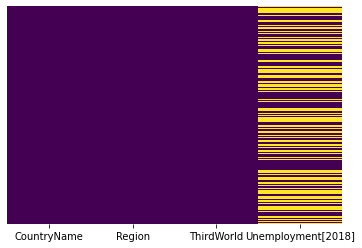

In [105]:
unemployment2018 = unemployment2018.replace({'..':np.nan})
sns.heatmap(unemployment2018.isnull() , yticklabels=False , cbar=False , cmap='viridis')

<AxesSubplot:>

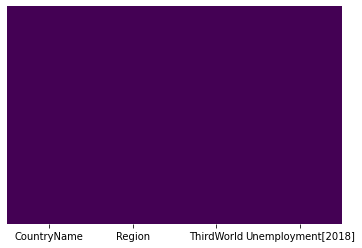

In [106]:
unemployment2018.dropna(inplace=True)
sns.heatmap(unemployment2018.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [107]:
unemployment2018 = unemployment2018.astype({'Unemployment[2018]':float})

In [108]:
unemployment2018.drop(['ThirdWorld'] , axis=1 , inplace=True)

In [109]:
unemployment2018[unemployment2018['Region'] == 'Thailand']

,CountryName,Region,Unemployment[2018]
192,Thailand,Thailand,0.77


In [110]:
africa_unemployment2018 = unemployment2018[unemployment2018['Region'] == 'Africa']
africa_unemployment2018.describe()

,Unemployment[2018]
count,14.000000
mean,10.027857
std,7.609440
min,1.130000
25%,3.820000
50%,9.990000
75%,14.375000
max,26.910000


In [111]:
print(find_iqr(africa_unemployment2018 , 'Unemployment[2018]'))

10.555


In [112]:
northern_eu_unemployment2018 = unemployment2018[unemployment2018['Region'] == 'Northern Europe']
northern_eu_unemployment2018.describe()

,Unemployment[2018]
count,10.000000
mean,5.402000
std,1.540749
min,2.700000
25%,4.282500
50%,5.555000
75%,6.307500
max,7.410000


In [113]:
print(find_iqr(northern_eu_unemployment2018 , 'Unemployment[2018]'))

2.0250000000000004


In [114]:
southeast_unemployment2018 = unemployment2018[unemployment2018['Region'] == 'Southeast Asia']
southeast_unemployment2018.describe()

,Unemployment[2018]
count,6.000000
mean,3.460000
std,2.884462
min,0.870000
25%,1.455000
50%,2.820000
75%,4.117500
max,8.700000


In [115]:
print(find_iqr(southeast_unemployment2018 , 'Unemployment[2018]'))

2.6624998995


In [116]:
africa_unemployment2018_wo = without_outlier_info(africa_unemployment2018 , 'Unemployment[2018]')
africa_unemployment2018_wo.describe()

,Unemployment[2018]
count,14.000000
mean,10.027857
std,7.609440
min,1.130000
25%,3.820000
50%,9.990000
75%,14.375000
max,26.910000


In [117]:
print(find_iqr(africa_unemployment2018_wo , 'Unemployment[2018]'))

10.555


In [118]:
northern_eu_unemployment2018_wo = without_outlier_info(northern_eu_unemployment2018 , 'Unemployment[2018]')
northern_eu_unemployment2018_wo.describe()

,Unemployment[2018]
count,10.000000
mean,5.402000
std,1.540749
min,2.700000
25%,4.282500
50%,5.555000
75%,6.307500
max,7.410000


In [119]:
print(find_iqr(northern_eu_unemployment2018_wo , 'Unemployment[2018]'))

2.0250000000000004


In [120]:
southeast_unemployment2018_wo = without_outlier_info(southeast_unemployment2018 , 'Unemployment[2018]')
southeast_unemployment2018_wo.describe()

,Unemployment[2018]
count,5.00000
mean,2.41200
std,1.47067
min,0.87000
25%,1.16000
50%,2.34000
75%,3.30000
max,4.39000


In [121]:
print(find_iqr(southeast_unemployment2018_wo , 'Unemployment[2018]'))

2.1399999999999997
